In [1]:
import growth_simulations as g
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
# import seaborn as sns

In [2]:
%load_ext autoreload 

In [3]:
%autoreload 2

In [4]:
def pcc_model(beta, sigma_t, gr, delta):
    # note that the growth function agrees to first order with that in the main text under the substitution delta=alpha
    temp_r=beta/(1-beta)
    num=delta/(2-delta)*((1-delta)*(np.log(temp_r)/(2*gr))**2-sigma_t**2)
    sigma_tdn=np.sqrt(2*sigma_t**2/(2-delta)+delta/(2-delta)*(np.log(temp_r)/(2*gr))**2)
    sigma_tdn1=np.sqrt((2*sigma_t**2+delta*(1-delta)**2*(np.log(temp_r)/(2*gr))**2)/(2-delta))
    denom=sigma_tdn*sigma_tdn1
    return num/denom

def pcc_model_siblings(beta, sigma_t, gr, delta):
    # note that the growth function agrees to first order with that in the main text under the substitution delta=alpha
    temp_r=beta/(1-beta)
    num=(2-delta)*sigma_t**2
    denom=2*sigma_t**2+delta*(1-delta)**2*(np.log(temp_r)/(2*gr))**2
    return 1-num/denom

In [5]:
temp_data=np.load('./output_compiled.npy')
temp_data1=np.load('./output_compiled_repeat1.npy')
data=np.concatenate((temp_data,temp_data1),axis=4)
# # Setting simulation parameters
l = np.array([1.0])
td_std = np.linspace(0.0, 0.1, 5)  # 3
lambda_std = np.linspace(0.0, 0.1, num=2)  # 3
delta = np.array([1.0])
beta = np.linspace(0.025, 0.5, num=20)  # 20
r = beta/(1-beta)
alpha = np.linspace(0.2, 1.0, num=5)  # 11
num_rep = 100  # number of repeats for both runs combined
# # should give 50000 repeats. Run with 1250 job array.
# # should take around 7 hours.49848679
x=1-2*beta
par_vals = {'nstep': 900, 'dt': 0.01, 'v_init': 1.0, 'modeltype': 15, 'delta': delta[0], 'lambda': l[0]}
X = [len(td_std), len(lambda_std), len(beta), len(alpha), num_rep]
print data.shape

(5, 2, 20, 5, 100, 3, 9)


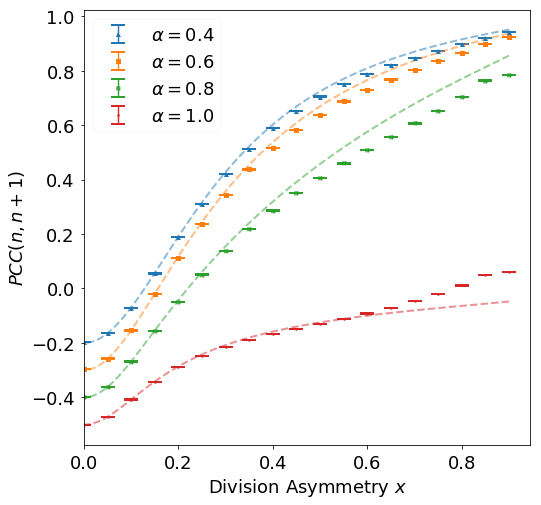

In [6]:
fig=plt.figure(figsize=[8,8])
# sns.set(font_scale=3)
plt.style.use('seaborn-paper')
ax=plt.subplot(1,1,1)
i0=4
i1=0
ind_beta_start=1
xv=x[ind_beta_start:]
# sns.set(font_scale=1.5)
markers=['v','^','s','X','.']
# sizes=[8,5,5,5,5]
for ind in range(1,5):
    yv=np.mean(data[i0,i1,ind_beta_start:,ind,:,0,0],axis=1)
    ystd=np.std(data[i0,i1,ind_beta_start:,ind,:,0,0],axis=1)
    plt.errorbar(xv,yv,yerr=ystd/np.sqrt(num_rep),label=r'$ \alpha={0}$'.format(alpha[ind]),linestyle='None',capsize=7,marker=markers[ind],markersize=5,capthick=2)
#     plt.fill_between(xv,yv-ystd,yv+ystd,alpha=0.3)
xv=np.linspace(x[ind_beta_start],x[-1],100)
plt.gca().set_prop_cycle(None)
for ind in range(1,5):
    yv=pcc_model(0.5-0.5*xv,td_std[i0],1.0,alpha[ind])
#     plt.plot(xv,yv,label=r'Theory $\alpha={0}$'.format(alpha[ind]),linestyle='--',lw=2)
    plt.plot(xv,yv,linestyle='--',lw=2,alpha=0.5)
plt.xlabel(r'Division Asymmetry $x$')
plt.xlim(xmin=0)
plt.ylabel(r'$PCC(n,n+1)$')
# plt.title(r'$\sigma_\lambda={0}$, $\sigma_t={1}$'.format(lambda_std[i1],td_std[i0]))
for item in ([ax.xaxis.label, ax.yaxis.label] +
              ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18)
plt.legend(prop={'size': 18})
fig.savefig('/mnt/d/Dropbox/19_growth_rate_paper/Figures/correlations/parent_mother.eps',dpi=300,bbox_inches='tight')

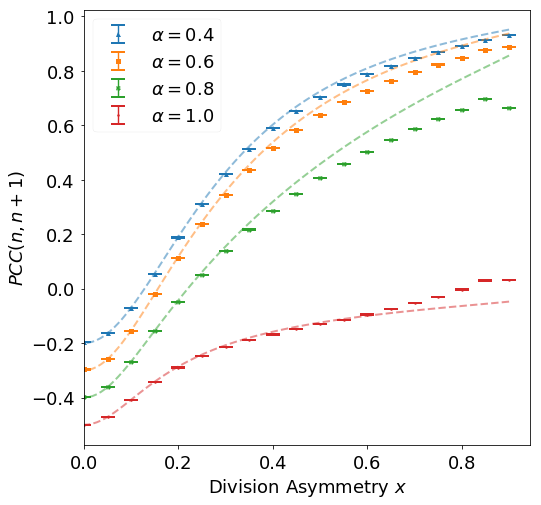

In [7]:
fig=plt.figure(figsize=[8,8])
# sns.set(font_scale=3)
plt.style.use('seaborn-paper')
ax=plt.subplot(1,1,1)
i0=4
i1=0
ind_beta_start=1
xv=x[ind_beta_start:]
# sns.set(font_scale=1.5)
markers=['v','^','s','X','.']
# sizes=[8,5,5,5,5]
for ind in range(1,5):
    yv=np.mean(data[i0,i1,ind_beta_start:,ind,:,1,0],axis=1)
    ystd=np.std(data[i0,i1,ind_beta_start:,ind,:,1,0],axis=1)
    plt.errorbar(xv,yv,yerr=ystd/np.sqrt(num_rep),label=r'$ \alpha={0}$'.format(alpha[ind]),linestyle='None',capsize=7,marker=markers[ind],markersize=5,capthick=2)
#     plt.fill_between(xv,yv-ystd,yv+ystd,alpha=0.3)
xv=np.linspace(x[ind_beta_start],x[-1],100)
plt.gca().set_prop_cycle(None)
for ind in range(1,5):
    yv=pcc_model(0.5-0.5*xv,td_std[i0],1.0,alpha[ind])
#     plt.plot(xv,yv,label=r'Theory $\alpha={0}$'.format(alpha[ind]),linestyle='--',lw=2)
    plt.plot(xv,yv,linestyle='--',lw=2,alpha=0.5)
plt.xlabel(r'Division Asymmetry $x$')
plt.xlim(xmin=0)
plt.ylabel(r'$PCC(n,n+1)$')
# plt.title(r'$\sigma_\lambda={0}$, $\sigma_t={1}$'.format(lambda_std[i1],td_std[i0]))
for item in ([ax.xaxis.label, ax.yaxis.label] +
              ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18)
plt.legend(prop={'size': 18})
fig.savefig('/mnt/d/Dropbox/19_growth_rate_paper/Figures/correlations/parent_daughter.eps',dpi=300,bbox_inches='tight')

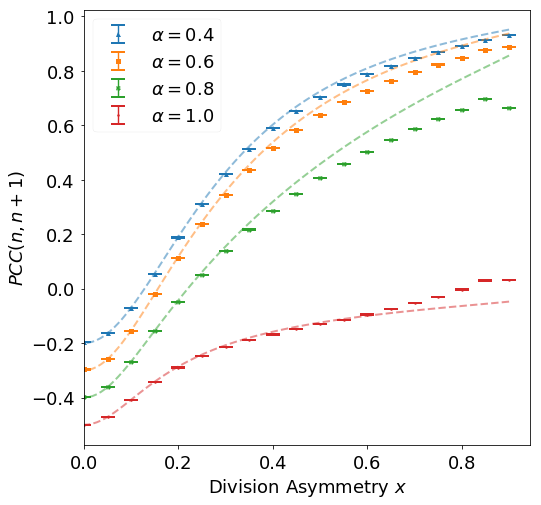

In [8]:
fig=plt.figure(figsize=[8,8])
# sns.set(font_scale=3)
plt.style.use('seaborn-paper')
ax=plt.subplot(1,1,1)
i0=4
i1=0
ind_beta_start=1
xv=x[ind_beta_start:]
# sns.set(font_scale=1.5)
markers=['v','^','s','X','.']
# sizes=[8,5,5,5,5]
for ind in range(1,5):
    yv=np.mean(data[i0,i1,ind_beta_start:,ind,:,1,0],axis=1)
    ystd=np.std(data[i0,i1,ind_beta_start:,ind,:,1,0],axis=1)
    plt.errorbar(xv,yv,yerr=ystd/np.sqrt(num_rep),label=r'$ \alpha={0}$'.format(alpha[ind]),linestyle='None',capsize=7,marker=markers[ind],markersize=5,capthick=2)
#     plt.fill_between(xv,yv-ystd,yv+ystd,alpha=0.3)
xv=np.linspace(x[ind_beta_start],x[-1],100)
plt.gca().set_prop_cycle(None)
for ind in range(1,5):
    yv=pcc_model(0.5-0.5*xv,td_std[i0],1.0,alpha[ind])
#     plt.plot(xv,yv,label=r'Theory $\alpha={0}$'.format(alpha[ind]),linestyle='--',lw=2)
    plt.plot(xv,yv,linestyle='--',lw=2,alpha=0.5)
plt.xlabel(r'Division Asymmetry $x$')
plt.xlim(xmin=0)
plt.ylabel(r'$PCC(n,n+1)$')
# plt.title(r'$\sigma_\lambda={0}$, $\sigma_t={1}$'.format(lambda_std[i1],td_std[i0]))
for item in ([ax.xaxis.label, ax.yaxis.label] +
              ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18)
plt.legend(prop={'size': 18})
fig.savefig('/mnt/d/Dropbox/19_growth_rate_paper/Figures/correlations/parent_daughter_td_std_01.eps',dpi=300,bbox_inches='tight')

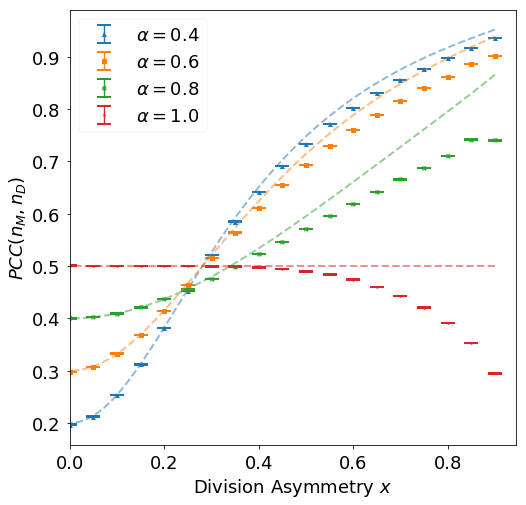

In [9]:
fig=plt.figure(figsize=[8,8])
# sns.set(font_scale=3)
plt.style.use('seaborn-paper')
ax=plt.subplot(1,1,1)
i0=4
i1=0
ind_beta_start=1
xv=x[ind_beta_start:]
# sns.set(font_scale=1.5)
markers=['v','^','s','X','.']
# sizes=[8,5,5,5,5]
for ind in range(1,5):
    yv=np.mean(data[i0,i1,ind_beta_start:,ind,:,2,0],axis=1)
    ystd=np.std(data[i0,i1,ind_beta_start:,ind,:,2,0],axis=1)
    plt.errorbar(xv,yv,yerr=ystd/np.sqrt(num_rep),label=r'$ \alpha={0}$'.format(alpha[ind]),linestyle='None',capsize=7,marker=markers[ind],markersize=5,capthick=2)
#     plt.fill_between(xv,yv-ystd,yv+ystd,alpha=0.3)
xv=np.linspace(x[ind_beta_start],x[-1],100)
plt.gca().set_prop_cycle(None)
for ind in range(1,5):
    yv=pcc_model_siblings(0.5*(1-xv),td_std[i0],1.0,alpha[ind])
    #     plt.plot(xv,yv,label=r'Theory $\alpha={0}$'.format(alpha[ind]),linestyle='--',lw=2)
    plt.plot(xv,yv,linestyle='--',lw=2,alpha=0.5)

plt.xlabel(r'Division Asymmetry $x$')
plt.xlim(xmin=0)
plt.ylabel(r'$PCC(n_M,n_D)$')
# plt.title(r'$\sigma_\lambda={0}$, $\sigma_t={1}$'.format(lambda_std[i1],td_std[i0]))
for item in ([ax.xaxis.label, ax.yaxis.label] +
              ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18)
plt.legend(prop={'size': 18})
fig.savefig('/mnt/d/Dropbox/19_growth_rate_paper/Figures/correlations/siblings.eps',dpi=300,bbox_inches='tight')

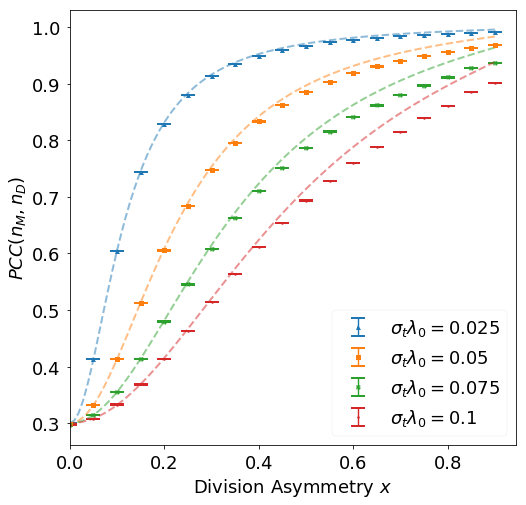

In [10]:
fig=plt.figure(figsize=[8,8])
# sns.set(font_scale=3)
plt.style.use('seaborn-paper')
ax=plt.subplot(1,1,1)
i0=2
i1=0
ind_beta_start=1
xv=x[ind_beta_start:]
# sns.set(font_scale=1.5)
markers=['v','^','s','X','.']
# sizes=[8,5,5,5,5]
for ind in range(1,5):
    yv=np.mean(data[ind,i1,ind_beta_start:,i0,:,2,0],axis=1)
    ystd=np.std(data[ind,i1,ind_beta_start:,i0,:,2,0],axis=1)
    plt.errorbar(xv,yv,yerr=ystd/np.sqrt(num_rep),label=r'$ \sigma_t\lambda_0={0}$'.format(td_std[ind]),linestyle='None',capsize=7,marker=markers[ind],markersize=5,capthick=2)
#     plt.fill_between(xv,yv-ystd,yv+ystd,alpha=0.3)
xv=np.linspace(x[ind_beta_start],x[-1],100)
plt.gca().set_prop_cycle(None)
for ind in range(1,5):
    yv=pcc_model_siblings(0.5*(1-xv),td_std[ind],1.0,alpha[i0])
#     plt.plot(xv,yv,label=r'Theory  $ \sigma_t\lambda_0={0}$'.format(td_std[ind]),linestyle='--',lw=2)
    plt.plot(xv,yv,linestyle='--',lw=2,alpha=0.5)
plt.xlabel(r'Division Asymmetry $x$')
plt.xlim(xmin=0)
plt.ylabel(r'$PCC(n_M,n_D)$')
# plt.title(r'$\sigma_\lambda={0}$, $\sigma_t={1}$'.format(lambda_std[i1],td_std[i0]))
for item in ([ax.xaxis.label, ax.yaxis.label] +
              ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18)
plt.legend(prop={'size': 18})
fig.savefig('/mnt/d/Dropbox/19_growth_rate_paper/Figures/correlations/variable_td_noise_siblings.eps',dpi=300,bbox_inches='tight')

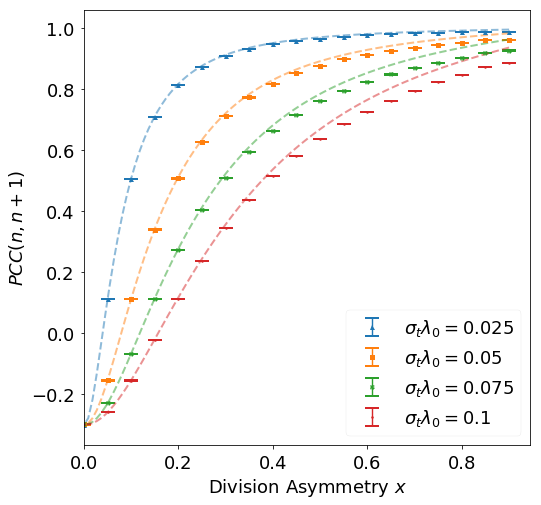

In [11]:
fig=plt.figure(figsize=[8,8])
# sns.set(font_scale=3)
plt.style.use('seaborn-paper')
ax=plt.subplot(1,1,1)
i0=2
i1=0
ind_beta_start=1
xv=x[ind_beta_start:]
# sns.set(font_scale=1.5)
markers=['v','^','s','X','.']
# sizes=[8,5,5,5,5]
for ind in range(1,5):
    yv=np.mean(data[ind,i1,ind_beta_start:,i0,:,1,0],axis=1)
    ystd=np.std(data[ind,i1,ind_beta_start:,i0,:,1,0],axis=1)
    plt.errorbar(xv,yv,yerr=ystd/np.sqrt(num_rep),label=r'$ \sigma_t\lambda_0={0}$'.format(td_std[ind]),linestyle='None',capsize=7,marker=markers[ind],markersize=5,capthick=2)
#     plt.fill_between(xv,yv-ystd,yv+ystd,alpha=0.3)
xv=np.linspace(x[ind_beta_start],x[-1],100)
plt.gca().set_prop_cycle(None)
for ind in range(1,5):
    yv=pcc_model(0.5*(1-xv),td_std[ind],1.0,alpha[i0])
#     plt.plot(xv,yv,label=r'Theory  $ \sigma_t\lambda_0={0}$'.format(td_std[ind]),linestyle='--',lw=2)
    plt.plot(xv,yv,linestyle='--',lw=2,alpha=0.5)
plt.xlabel(r'Division Asymmetry $x$')
plt.xlim(xmin=0)
plt.ylabel(r'$PCC(n,n+1)$')
# plt.title(r'$\sigma_\lambda={0}$, $\sigma_t={1}$'.format(lambda_std[i1],td_std[i0]))
for item in ([ax.xaxis.label, ax.yaxis.label] +
              ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18)
plt.legend(prop={'size': 18})
fig.savefig('/mnt/d/Dropbox/19_growth_rate_paper/Figures/correlations/variable_td_noise_parent_daughter.eps',dpi=300,bbox_inches='tight')

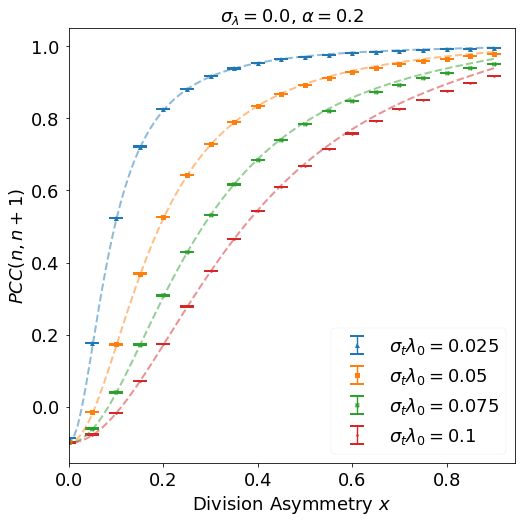

In [12]:
fig=plt.figure(figsize=[8,8])
# sns.set(font_scale=3)
plt.style.use('seaborn-paper')
ax=plt.subplot(1,1,1)
i0=0
i1=0
ind_beta_start=1
xv=x[ind_beta_start:]
# sns.set(font_scale=1.5)
markers=['v','^','s','X','.']
# sizes=[8,5,5,5,5]
for ind in range(1,5):
    yv=np.mean(data[ind,i1,ind_beta_start:,i0,:,1,0],axis=1)
    ystd=np.std(data[ind,i1,ind_beta_start:,i0,:,1,0],axis=1)
    plt.errorbar(xv,yv,yerr=ystd/np.sqrt(num_rep),label=r'$ \sigma_t\lambda_0={0}$'.format(td_std[ind]),linestyle='None',capsize=7,marker=markers[ind],markersize=5,capthick=2)
#     plt.fill_between(xv,yv-ystd,yv+ystd,alpha=0.3)
xv=np.linspace(x[ind_beta_start],x[-1],100)
plt.gca().set_prop_cycle(None)
for ind in range(1,5):
    yv=pcc_model(0.5*(1-xv),td_std[ind],1.0,alpha[i0])
#     plt.plot(xv,yv,label=r'Theory  $ \sigma_t\lambda_0={0}$'.format(td_std[ind]),linestyle='--',lw=2)
    plt.plot(xv,yv,linestyle='--',lw=2,alpha=0.5)
plt.xlabel(r'Division Asymmetry $x$')
plt.xlim(xmin=0)
plt.ylabel(r'$PCC(n,n+1)$')
plt.title(r'$\sigma_\lambda={0}$, $\alpha={1}$'.format(lambda_std[i1],alpha[i0]))
for item in ([ax.xaxis.label, ax.yaxis.label,ax.title] +
              ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18)
plt.legend(prop={'size': 18})
fig.savefig('/mnt/d/Dropbox/19_growth_rate_paper/Figures/correlations/variable_td_noise_parent_daughter_alpha_02.eps',dpi=300,bbox_inches='tight')

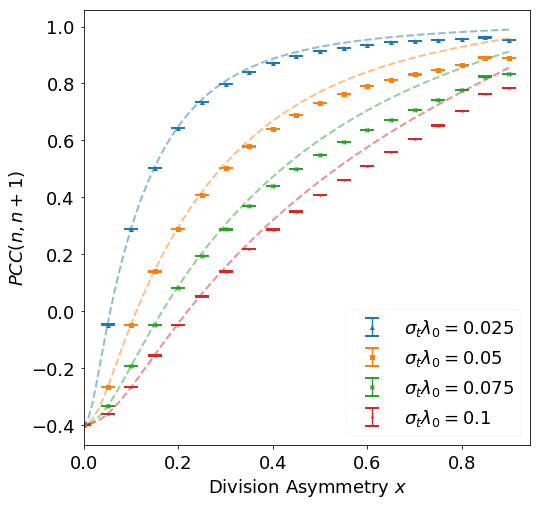

In [13]:
fig=plt.figure(figsize=[8,8])
# sns.set(font_scale=3)
plt.style.use('seaborn-paper')
ax=plt.subplot(1,1,1)
i0=3
i1=0
ind_beta_start=1
xv=x[ind_beta_start:]
# sns.set(font_scale=1.5)
markers=['v','^','s','X','.']
# sizes=[8,5,5,5,5]
for ind in range(1,5):
    yv=np.mean(data[ind,i1,ind_beta_start:,i0,:,0,0],axis=1)
    ystd=np.std(data[ind,i1,ind_beta_start:,i0,:,0,0],axis=1)
    plt.errorbar(xv,yv,yerr=ystd/np.sqrt(num_rep),label=r'$ \sigma_t\lambda_0={0}$'.format(td_std[ind]),linestyle='None',capsize=7,marker=markers[ind],markersize=5,capthick=2)
#     plt.fill_between(xv,yv-ystd,yv+ystd,alpha=0.3)
xv=np.linspace(x[ind_beta_start],x[-1],100)
plt.gca().set_prop_cycle(None)
for ind in range(1,5):
    yv=pcc_model(0.5*(1-xv),td_std[ind],1.0,alpha[i0])
#     plt.plot(xv,yv,label=r'Theory  $ \sigma_t\lambda_0={0}$'.format(td_std[ind]),linestyle='--',lw=2)
    plt.plot(xv,yv,linestyle='--',lw=2,alpha=0.5)
plt.xlabel(r'Division Asymmetry $x$')
plt.xlim(xmin=0)
plt.ylabel(r'$PCC(n,n+1)$')
# plt.title(r'$\sigma_\lambda={0}$, $\sigma_t={1}$'.format(lambda_std[i1],td_std[i0]))
for item in ([ax.xaxis.label, ax.yaxis.label] +
              ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18)
plt.legend(prop={'size': 18})
fig.savefig('/mnt/d/Dropbox/19_growth_rate_paper/Figures/correlations/variable_td_noise_parent_mother.eps',dpi=300,bbox_inches='tight')

In [13]:
# Setting simulation parameters
l = np.array([1.0])
td_std = np.linspace(0.0, 0.2, 11)  # 1
lambda_std = np.linspace(0.0, 0.3, num=13)  # 5
delta = np.array([1.0])
beta = np.linspace(0.05, 0.5, num=10)  # 9
r = beta/(1-beta)
alpha = np.linspace(0.0, 1.0, num=11)  # 5
num_rep = 40  # number of repeats

par_vals = {'nstep': 1000, 'dt': 0.01, 'v_init': 1.0, 'modeltype': 15, 'delta': delta[0], 'lambda': l[0]}
par_vals['td_std'] = td_std[5]
par_vals['lambda_std']=lambda_std[0]
par_vals['r']=r[5]
par_vals['alpha']=alpha[2]

In [14]:
init_pop = g.starting_popn(par_vals)
par_vals['nstep']=500
c, obs, [temp_vols,temp_vols_G1] = g.discr_time_1(par_vals, init_pop)
init_pop = g.starting_popn_seeded(c, par_vals)
par_vals['nstep']=900
c, obs, [temp_vols,temp_vols_G1] = g.discr_time_1(par_vals, init_pop)

KeyboardInterrupt: 

In [15]:
i6=0
xv = [obj.t_grow for obj in c if obj.celltype == i6 and obj.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda'] and obj.parent.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda']]
yv = [obj.parent.t_grow for obj in c if obj.celltype == i6 and obj.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda'] and obj.parent.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda']]
temp = scipy.stats.pearsonr(xv, yv)
print temp[0]
print par_vals
print pcc_model(par_vals['r']/(1+par_vals['r']), par_vals['td_std'], 1.0, par_vals['alpha'])

0.5402340118412697
{'td_std': 0.1, 'lambda_std': 0.0, 'v_init': 1.0, 'modeltype': 15, 'r': 0.4285714285714286, 'delta': 1.0, 'alpha': 0.2, 'dt': 0.01, 'nstep': 900, 'lambda': 1.0}
0.545120042010448


In [18]:
xv=[obj for obj in c if obj.celltype == 0 and obj.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda'] and obj.parent.celltype==0]
yv=[obj for obj in c if obj.celltype == 0 and obj.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda'] and obj.parent.celltype==1]
random_inds1 = np.random.randint(0,len(xv),10**4)
random_inds2 = np.random.randint(0,len(yv),10**4)
zv = [xv[ind] for ind in random_inds1]+[yv[ind] for ind in random_inds2]
zv1=[obj.t_grow for obj in zv]
zv2=[obj.parent.t_grow for obj in zv]
temp = scipy.stats.pearsonr(zv1, zv2)
print temp

(0.5491428777069386, 0.0)


Text(0.5,0,'Vb')

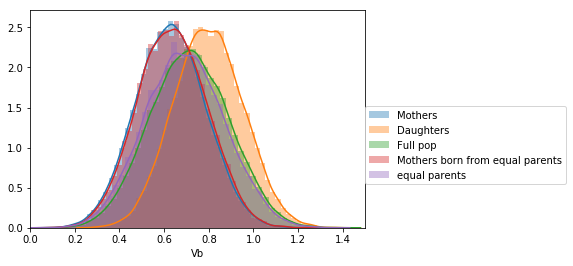

In [14]:
xv = [obj.t_grow for obj in c if obj.celltype==0 and obj.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda'] and obj.parent.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda']]
yv = [obj.t_grow for obj in c if obj.celltype==1 and obj.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda'] and obj.parent.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda']]
fullpop=[obj.t_grow for obj in c if obj.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda'] and obj.parent.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda']]
sns.distplot(xv, label='Mothers')
sns.distplot(yv, label='Daughters')
sns.distplot(fullpop,label='Full pop')
sns.distplot(zv1, label='Mothers born from equal parents')
sns.distplot(zv2, label='equal parents')
plt.legend(loc=[1.0,0.2])
plt.xlim(xmin=0,xmax=1.5)
plt.xlabel('Vb')

In [16]:
xv = [obj.t_grow for obj in c if
      obj.celltype == 1 and obj.tb > 400 * par_vals['dt'] * np.log(2) / par_vals['lambda']]  # daughter progeny
yv = [obj.parent.nextgen.t_grow for obj in c if
      obj.celltype == 1 and obj.tb > 400 * par_vals['dt'] * np.log(2) / par_vals['lambda']]  # mother progeny
temp = scipy.stats.pearsonr(xv, yv)
print temp[0]
print pcc_model_siblings(par_vals['r']/(1+par_vals['r']), par_vals['td_std'], 1.0, par_vals['alpha'])

0.5810390948432628
0.5811346514758391
